<a href="https://colab.research.google.com/github/chennamsettyanitha/Restaurant-Review/blob/main/Restaurant_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# Importing ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import warnings

In [ ]:
warnings.filterwarnings('ignore')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv('/content/Restaurant_Reviews (1).tsv', delimiter='\t')
# The delimiter is explicitly set to '\t' to correctly parse the tab-separated values in the file.

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.shape

(1000, 2)

In [ ]:
data.isnull().sum()

,0
Review,0
Liked,0


In [ ]:
data['Liked'].value_counts()

,count
Liked,
1,500
0,500


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
# Adding Columns of char, word, and sent count
# No. of Characters column
data['char_count']=data['Review'].apply(len)
# No. of Words count column
data['word_count']=data['Review'].apply(lambda x :len(str(x).split()))
# No. of Sent count column
data['sent_count']=data['Review'].apply(lambda x:len(nltk.sent_tokenize(str(x))))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
data.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [ ]:
# avg #char in positive reviews
data[data['Liked']==1]['char_count'].mean()

55.88

In [ ]:
# avg #char in negative reviews
data[data['Liked']==0]['char_count'].mean()

60.75

In [ ]:
data['Review'][1]

'Crust is not good.'

In [ ]:
review=re.sub('[^a-zA-Z]',' ',data['Review'][1])

In [ ]:
review=review.lower()

In [ ]:
review=review.split()

In [ ]:
review

['crust', 'is', 'not', 'good']

In [ ]:
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')


In [ ]:
all_stopwords


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'o

In [ ]:
review=[word for word in review if word not in set(all_stopwords)]

In [ ]:
review

['crust', 'not', 'good']

In [ ]:
custom_stopwords = {
    'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
}
corpus=[]
ps = PorterStemmer()
stop_words=set(stopwords.words("english"))-custom_stopwords

for i in range(len(data)):
    review=re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stop_words]
    review=" ".join(review)
    corpus.append(review)

In [ ]:
data['processed_text']=corpus

In [ ]:
data.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [ ]:
wc=WordCloud(width=500, height=500,min_font_size=8, background_color='white')

In [ ]:
pos_reviews = wc.generate(data[data['Liked'] == 1]['processed_text'].str.cat(sep=" "))


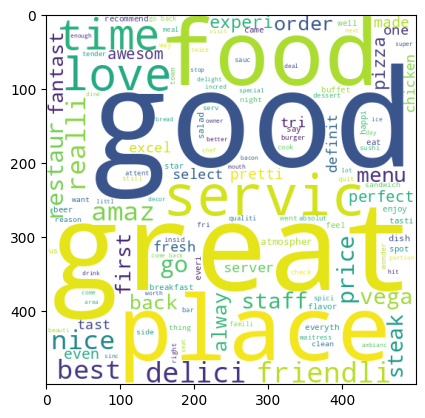

In [ ]:
plt.imshow(pos_reviews)


In [ ]:
neg_reviews = wc.generate(data[data['Liked'] == 0]['processed_text'].str.cat(sep=" "))


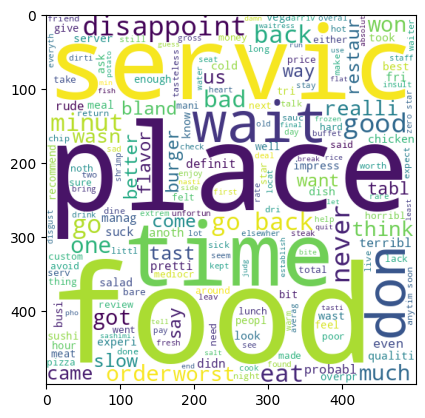

In [ ]:
plt.imshow(neg_reviews)


In [ ]:
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(1000, 1500)

In [ ]:
y=data['Liked']

In [ ]:
y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# Training Naive Bayes Model

nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.68

In [ ]:
# Training Logistic Regression Model
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.79

In [ ]:
# Training Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8

In [ ]:
import joblib
import os # Import the os module
from IPython.display import FileLink

# Save the model
joblib.dump(rf, "Restaurant_review_model.joblib")

# Create the directory if it doesn't exist - replace 'my_directory' with your desired path
os.makedirs("my_directory", exist_ok=True)
# Move the model to the new directory
shutil.move("Restaurant_review_model.joblib", os.path.join("my_directory", "Restaurant_review_model.joblib"))

'my_directory/Restaurant_review_model.joblib'

In [ ]:
import joblib
import os # Import the os module
from IPython.display import FileLink

# Save the model
joblib.dump(rf, "Restaurant_review_model.joblib")

# Create the directory if it doesn't exist - replace 'my_directory' with your desired path
os.makedirs("my_directory", exist_ok=True)
# Move the model to the new directory
shutil.move("Restaurant_review_model.joblib", os.path.join("my_directory", "Restaurant_review_model.joblib"))

# Save the CountVectorizer
joblib.dump(cv, "count_v_res.joblib")

# Define the destination directory within the current working directory
destination_dir = "my_directory"  # Or another directory you have write access to
os.makedirs(destination_dir, exist_ok=True)  # Create if it doesn't exist

# Move to the specified directory
shutil.move("count_v_res.joblib", os.path.join(destination_dir, "count_v_res.joblib"))

'my_directory/count_v_res.joblib'